1. INITIALIZATION

Here are the packages for performing data processing, visualization, and statistical analysis.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import ttest_ind

1. READ THE CSV DATA

Pandas fetches the data_nobalance.csv into a DataFrame, sets encoding as ansi and separator as ;. After these I gave the DataFrame proper column names to make processes and references simpler. 


In [4]:
df = pd.read_csv("data_nobalance.csv", sep=";", encoding="ansi", header=None)
df.columns = ["DateTimeStr", "TransactionAmountStr", "BalanceStr", "Description", "ExtraColumn"]  

3. PARSE/CLEAN THE DATA

This raw data has been converted here to prepare for the analysis. The DateTimeStr column is first converted into the proper datetime format with the given date format, generously correcting errors. The original DateTimeStr column is then deleted. Using the custom function called parse_tl_amount, the monetary values from TransactionAmountStr and BalanceStr columns are cleaned and transformed so that "TL" and other superfluous spaces are removed to ensure that proper decimals are in place. 

Those cleaned values are then converted to numeric form, described, and recorded into the TransactionAmount and Balance columns. After that, the original string amounts based on transaction and balance are removed, and the only data processed remains.


In [5]:
date_format = "%Y-%m-%d-%H.%M.%S.%f"
df["DateTime"] = pd.to_datetime(df["DateTimeStr"], format=date_format, errors="coerce")
df.drop(columns=["DateTimeStr"], inplace=True)

def parse_tl_amount(x):

    if isinstance(x, str):
        x = x.replace("TL", "").strip().replace(",", ".").replace("   ", "").replace(" ", "")
        if "." not in x:
            if len(x) > 2:
                x = x[:-2] + "." + x[-2:]
    else:
        return np.nan
    try:
        return float(x)
    except ValueError:
        return np.nan

df["TransactionAmount"] = df["TransactionAmountStr"].apply(parse_tl_amount)
df["Balance"] = df["BalanceStr"].apply(parse_tl_amount)


df.drop(columns=["TransactionAmountStr", "BalanceStr"], inplace=True)

4. EXTRACT TIME/DATE FEATURES

I made new columns in the DataFrame for extra analysis after extracting some temporally based properties from the DateTime column; they contain the year, the month's full name, the day of the week (Monday, Tuesday, etc.), and the transaction's hour. These features, retrieved through this process, help create a trend and pattern analysis through time.

In [6]:
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month_name()
df["DayOfWeek"] = df["DateTime"].dt.day_name()  # Monday, Tuesday...
df["Hour"] = df["DateTime"].dt.hour

5. 1) Transactions Count by Day of Week
  
This bar plot is developed to represent the number of transactions on each day of the week. It uses color scheme Set2 for beautification purposes, and the days are arranged from Monday to Sunday. The chart contains the title, both axes label, and rotated x-axis labels to enhance reading. Plot displays, and the arrangement is changed to ensure that the components fit into place properly.

C:\Users\ertug\AppData\Local\Temp\ipykernel_7236\3845493601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DayOfWeek",


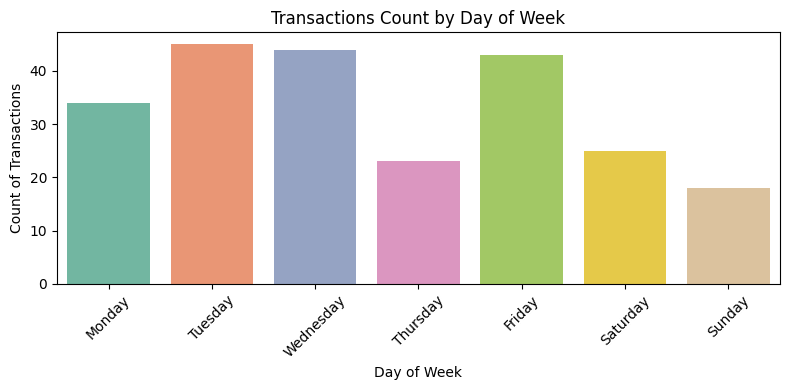

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="DayOfWeek", 
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], 
              palette="Set2")
plt.title("Transactions Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

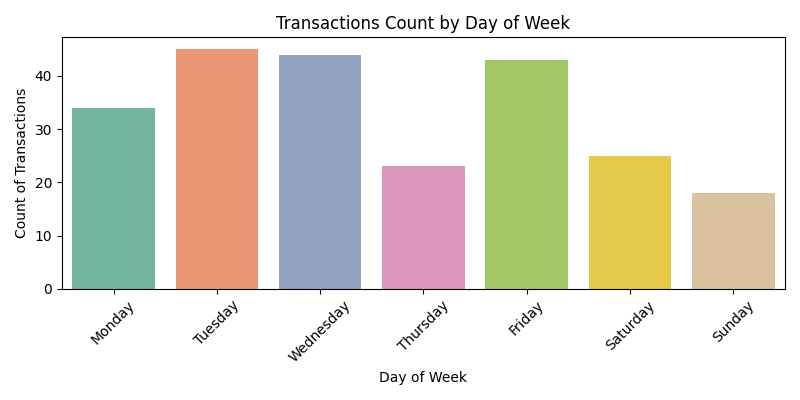

Observed that, Tuesdays, Weekdays and Fridays are the days which are the days most transactions made

5. 2) Transactions Count by Hour
  
This bar chart displays the number of transactions for every hour of the day via the hour column on the x-axis and transaction counts on the y-axis. The layout is changed to enhance the visualization, colors Set3 are used and the titles and axis labels are added to clarify.

C:\Users\ertug\AppData\Local\Temp\ipykernel_7236\548962749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hour", palette="Set3")


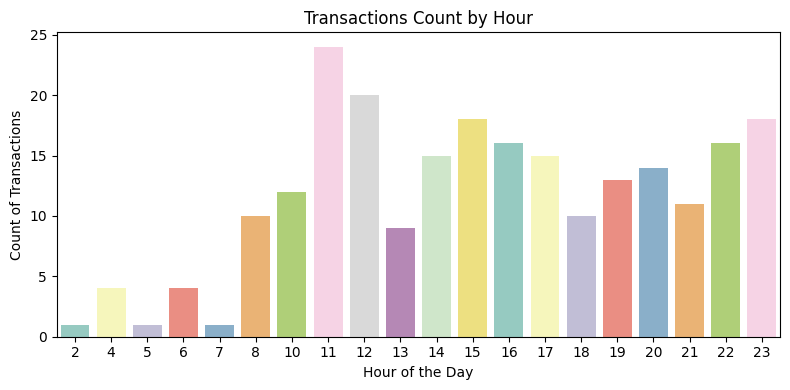

In [12]:

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Hour", palette="Set3")
plt.title("Transactions Count by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Transactions")
plt.tight_layout()
plt.show()

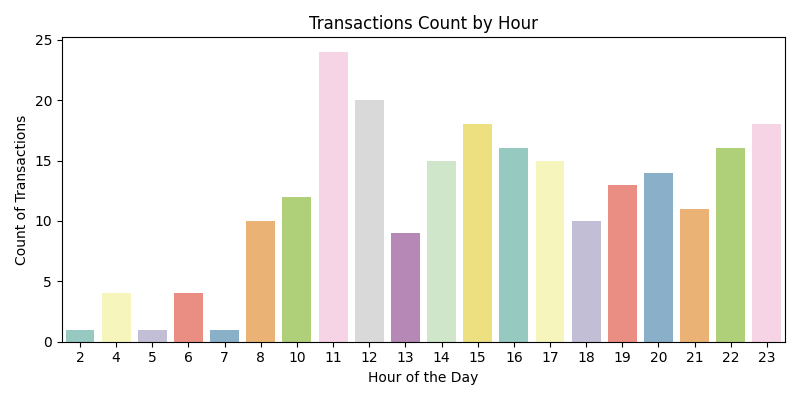

From this data, it is seen that any time between 11 AM to 11.59 PM, transactions are the densest.

5. 3) Histogram of Transaction Amounts
  
This histogram displays the distribution of the transaction amounts over which smoothening is superposed through a kernel density estimate on the histogram. Thus, the transaction amounts are represented on the x-axis, their features are expressed on the y-axis. Total of thirty bins, purple color scheme; appropriately spaced layout, titles, and labels for clarity.

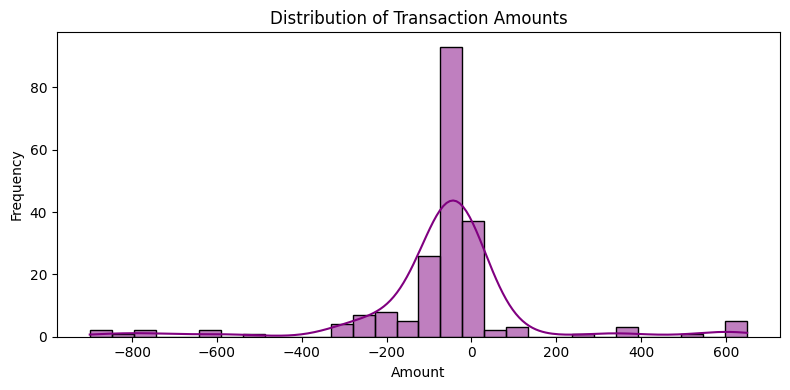

In [13]:

plt.figure(figsize=(8, 4))
sns.histplot(df["TransactionAmount"], kde=True, color="purple", bins=30)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

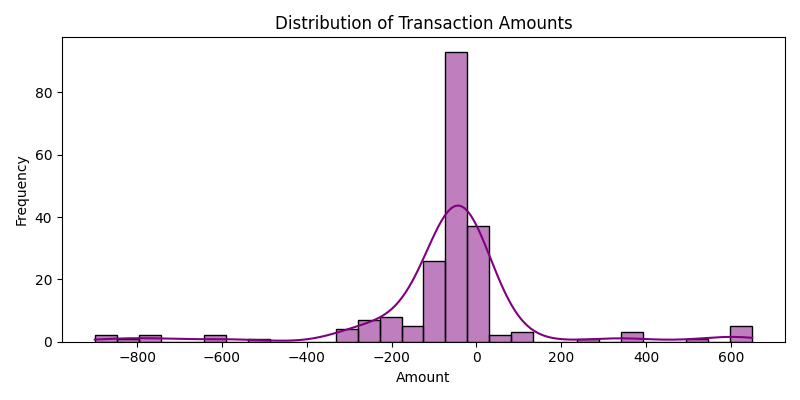 


5. 4) Heatmap: DayOfWeek vs Hour (count of transactions)
  
I created a heat map to show the number of transactions based on day of the week and time of the day. I also re-ordered the rows from Monday to Sunday after grouping the counts of transactions by DayOfWeek and Hour at pivot table. This turned out quite new because of the complexity of how I formed the heatmap. It used the `Reds` color scheme and displayed a title and axis labels. There were also annotations to illustrate the counts. I rearranged the layout again for visibility purposes.


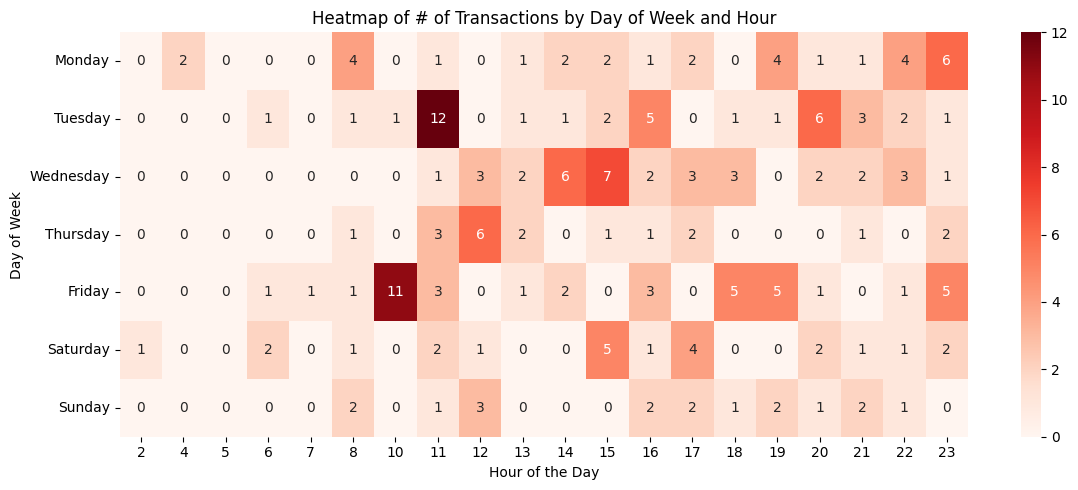

In [14]:

pivot_data = df.pivot_table(index="DayOfWeek", columns="Hour", values="TransactionAmount", aggfunc="count", fill_value=0)
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot_data = pivot_data.reindex(day_order)

plt.figure(figsize=(12, 5))
sns.heatmap(pivot_data, cmap="Reds", annot=True, fmt="d")
plt.title("Heatmap of # of Transactions by Day of Week and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

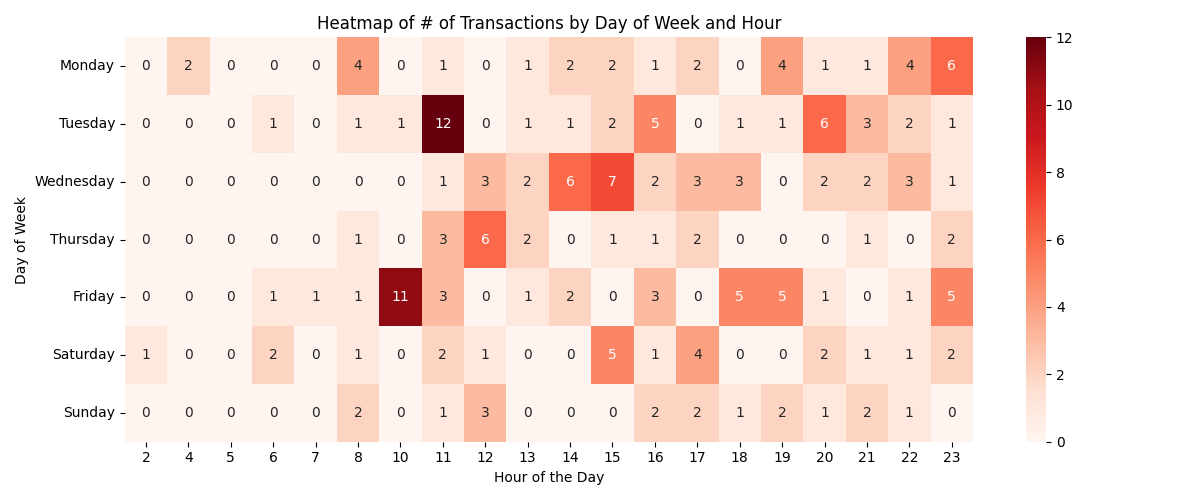

From the heatmap, except the two abnormal peaks which are at tuesday and friday, which is I assume it is because I made exceptinal frequent and small amount transactions. Other than that, the chart indicated a heat between wednesday 2 PM and 6 PM.

5. 5) KDE Plot: Hour vs Transaction Amount
  
This is a density plot that was made to investigate the relationship between the transaction amount and the time of day. The y-axis refers to the transaction amount, while the x-axis represents the hour. To enable better visualization, there were filled density areas using `mako` color map. I will therefore adjust the layout for clarityand include titles and labels for context.


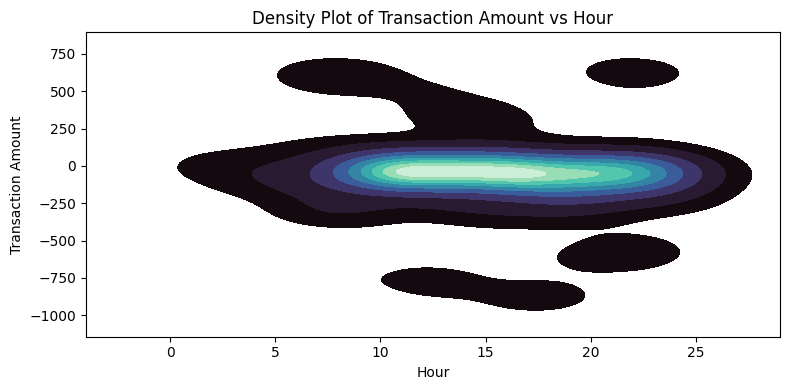

In [15]:

plt.figure(figsize=(8, 4))
sns.kdeplot(x=df["Hour"], y=df["TransactionAmount"], fill=True, cmap="mako")
plt.title("Density Plot of Transaction Amount vs Hour")
plt.xlabel("Hour")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()

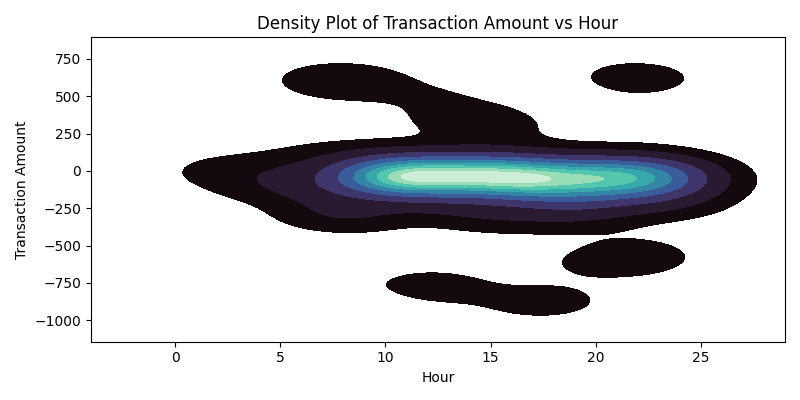

5. 6) Plot # of Transactions Per Day in a 3-Month Range + "Beta" (Slope) Interpretation
  
Now, this is the trickiest part.

The daily transaction counts were analyzed for the last three months of the data. First, the maximum date was identified, and the records were filtered within a three-month range. Then, the data were grouped by date and the transaction count per day was calculated. A line chart was made for visualization of daily transaction counts over that period.

In order to find trends, I applied simple linear regression to the transaction counts, in which the slope (`Beta`) of the analysis indicates whether the activity increased or decreased over time. A positive slope indicates an upward trend of activity, while a downward trend indicates a negative slope. The outcomes from the analysis, including the slope value along with its interpretation, are printed for further scrutiny. If the dataset did not contain any valid `DateTime`, this scenario would be taken care of by producing a message and would not allow proceeding to analysis afterward.


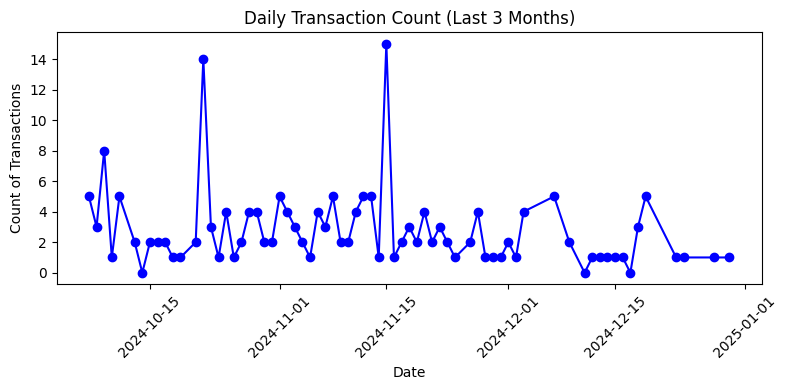


[6] 3-Month Daily Transaction Trend:
    - Found slope (Beta): -0.030
    - Interpretation: If Beta>0, transactions are generally increasing over time, else decreasing.


In [16]:
if not df["DateTime"].isna().all():
    max_date = df["DateTime"].max()
    three_months_ago = max_date - pd.DateOffset(months=3)

    # Filter data for last 3 months
    mask_3mo = (df["DateTime"] >= three_months_ago) & (df["DateTime"] <= max_date)
    df_3mo = df.loc[mask_3mo].copy()

    # Group by date (ignoring time)
    daily_counts_3mo = df_3mo.groupby(df_3mo["DateTime"].dt.date)["TransactionAmount"].count()
    daily_counts_3mo = daily_counts_3mo.reset_index()
    daily_counts_3mo.columns = ["Date", "TransactionCount"]

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(daily_counts_3mo["Date"], daily_counts_3mo["TransactionCount"], marker='o', color='blue')
    plt.title("Daily Transaction Count (Last 3 Months)")
    plt.xlabel("Date")
    plt.ylabel("Count of Transactions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Regression to find the slope (Beta) to see if there's an upward/downward trend
    # We'll do a simple linear regression: 
    #   y = a + bX, where X is an integer day index, y = TransactionCount
    daily_counts_3mo = daily_counts_3mo.sort_values("Date")
    # Create an index from 0..N-1
    daily_counts_3mo["DayIndex"] = range(len(daily_counts_3mo))

    # Fit a simple regression using numpy polyfit
    x = daily_counts_3mo["DayIndex"].values
    y = daily_counts_3mo["TransactionCount"].values
    b, a = np.polyfit(x, y, 1)  # slope = b, intercept = a
    # b is the "Beta" slope
    print(f"\n[6] 3-Month Daily Transaction Trend:")
    print(f"    - Found slope (Beta): {b:.3f}")
    print(f"    - Interpretation: If Beta>0, transactions are generally increasing over time, else decreasing.")

else:
    print("No valid DateTime data to do 3-month analysis.")

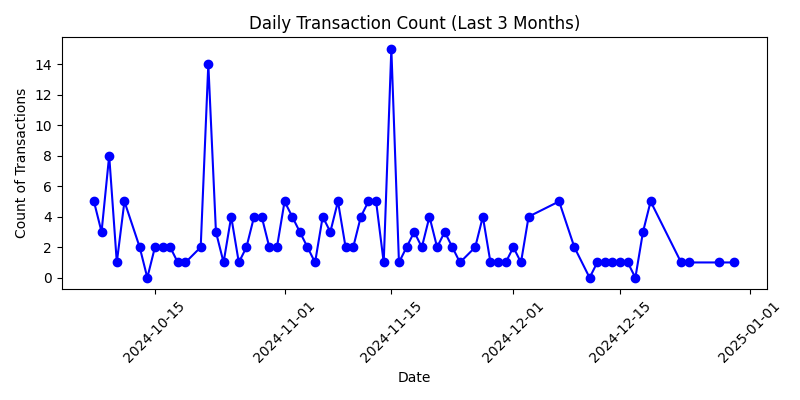

5. 7) Transaction Distribution by "Place"
  
By count, I visualized the top ten places of transition. The places were identified by the column `Description`, then the 10 most common were selected. A bar chart was designed horizontally, where transactions are reported on the 'x' axis and place names on the 'y' axis. The color pallette `Blues_r` was used, and titles and labels were added for clarity. The layout was adjusted for readability, and display charts were published.


In [ ]:
plt.figure(figsize=(8, 4))

place_counts = df["Description"].value_counts().nlargest(10)  # top 10
sns.barplot(x=place_counts.values, y=place_counts.index, palette="Blues_r")
plt.title("Top 10 Transaction Places by Count")
plt.xlabel("Count of Transactions")
plt.ylabel("Place (from Description)")
plt.tight_layout()
plt.show()

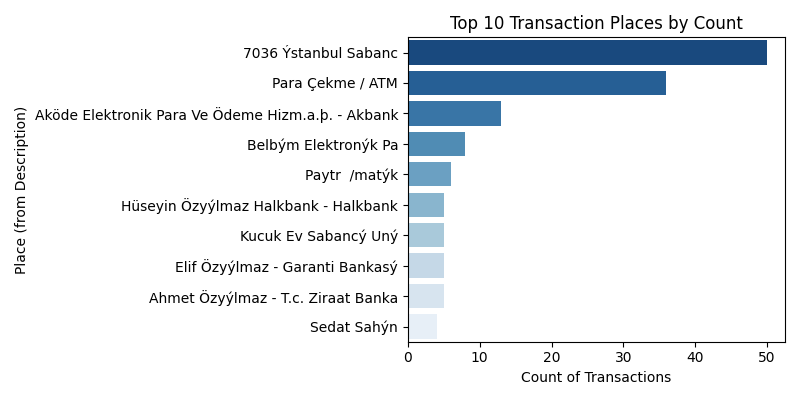

6. EXAMPLE STATISTICAL TEST

I performed a T-test to compare the amount of transactions for the morning (Hour < 12) and evening (Hour ≥ 12) and to see whether a correlation between transactions, and the time of the day. First, I filtered both the amount for each time period and excluded any missing data. If both groups matched the criteria of having enough data points then an independent two-sample, unequal variance Test was done to check if the means of both groups differed significantly. The T-stat and p-value have been calculated and displayed, where if the p-value is lesser than 0.05, it indicates a statistically significant difference between groups at 5% significance level; otherwise, it concludes that there is no difference. In case of insufficient data, skip the test and give a corresponding message.


In [17]:

morning_amounts = df.loc[df["Hour"] < 12, "TransactionAmount"].dropna()
evening_amounts = df.loc[df["Hour"] >= 12, "TransactionAmount"].dropna()

if len(morning_amounts) > 1 and len(evening_amounts) > 1:
    t_stat, p_val = ttest_ind(morning_amounts, evening_amounts, equal_var=False)
    print("\nT-Test: Morning vs. Evening Transaction Amounts")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  p-value: {p_val:.6f}")
    if p_val < 0.05:
        print("  -> Statistically significant difference at alpha=0.05!")
    else:
        print("  -> No statistically significant difference at alpha=0.05.")
else:
    print("\nNot enough data to perform T-test for morning vs evening amounts.")


T-Test: Morning vs. Evening Transaction Amounts
  T-statistic: 1.088
  p-value: 0.279732
  -> No statistically significant difference at alpha=0.05.


Observations:

I have got the output of the following:

    T-Test: Morning vs. Evening Transaction Amounts
      T-statistic: 1.088
      p-value: 0.279732
      -> No statistically significant difference at alpha=0.05.

Which we can conclude that there is not a significant correlation between the time of the day and transaction amount.


7. TERMINATION

Finalization of my code.

In [ ]:
# ------------------------------------------------------------------------------
print("\nScript finished. Review the additional plots and printed results!")